<a href="https://colab.research.google.com/github/Mehmetmrtgl/image_restore/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

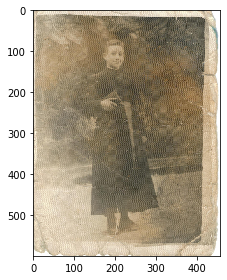

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from scipy import fftpack
import numpy.fft as fp

oldphoto=io.imread('oldphoto.jpg')
io.imshow(oldphoto)

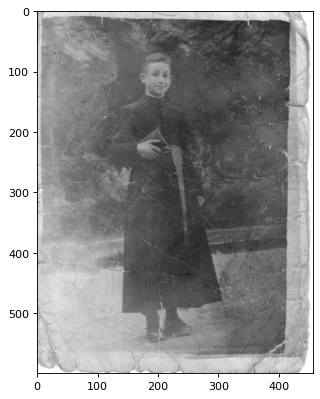

In [ ]:
oldphoto_grey = rgb2gray(oldphoto)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(oldphoto_grey, cmap='gray');

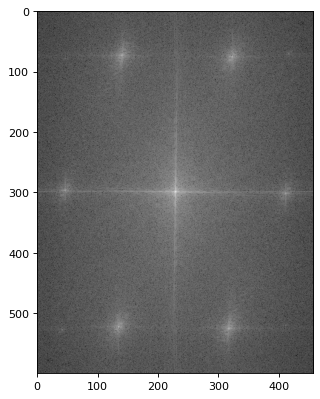

In [ ]:
oldphoto_grey_fourier = np.fft.fftshift(np.fft.fft2(oldphoto_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(oldphoto_grey_fourier)), cmap='gray');


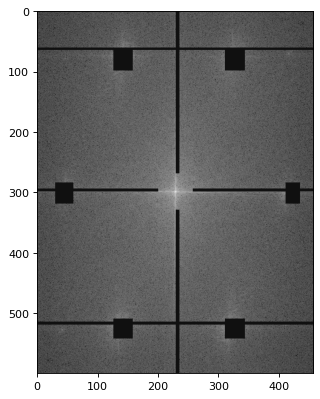

In [ ]:

oldphoto_grey_fourier[:270, 229:235] = 0.1
oldphoto_grey_fourier[-270:,229:235] = 0.1

oldphoto_grey_fourier[295:300, :200] = 0.1
oldphoto_grey_fourier[295:300,-200:] = 0.1

oldphoto_grey_fourier[62:66, :250] = 0.1
oldphoto_grey_fourier[62:66,-250:] = 0.1

oldphoto_grey_fourier[62:100, 310:343]=0.1
oldphoto_grey_fourier[62:100,126:158 ]=0.1

oldphoto_grey_fourier[510:543, 310:343]=0.1
oldphoto_grey_fourier[510:543,126:158 ]=0.1

oldphoto_grey_fourier[515:520, :250]=0.1
oldphoto_grey_fourier[515:520,-250: ]=0.1

oldphoto_grey_fourier[285:320, 30:60]=0.1
oldphoto_grey_fourier[285:320,410:434 ]=0.1


plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(oldphoto_grey_fourier)), cmap='gray');

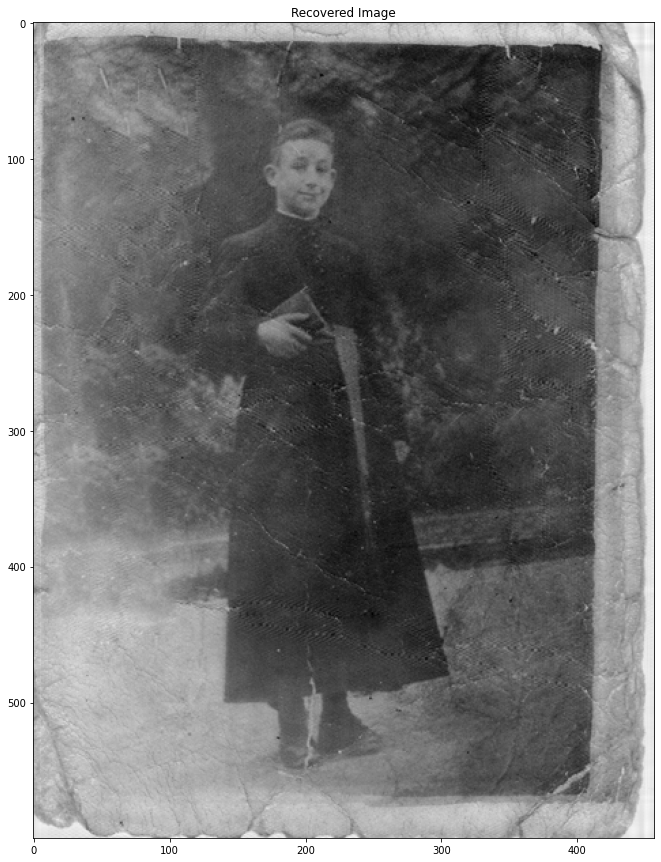

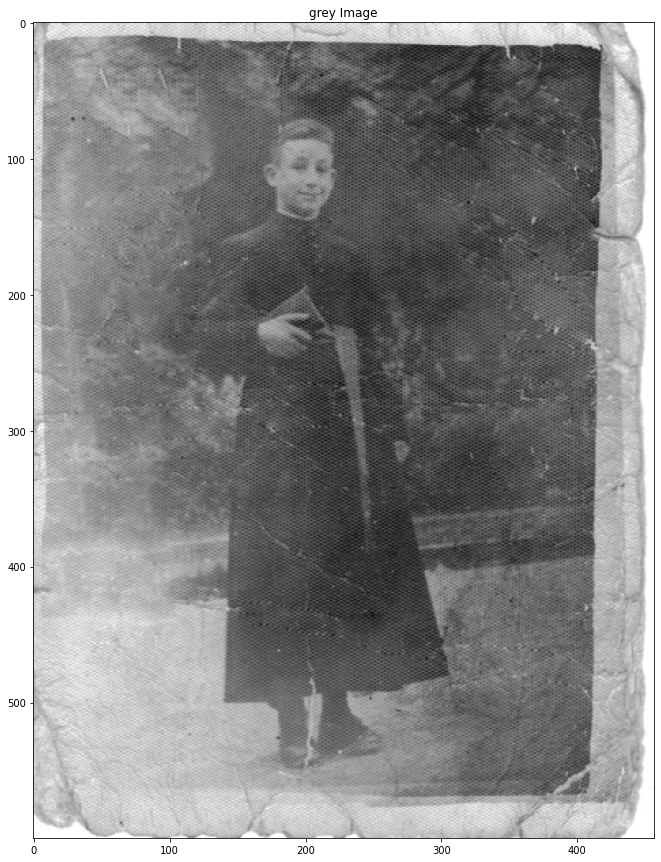

In [ ]:
im1 = fp.ifft2(fftpack.ifftshift(oldphoto_grey_fourier)).real

plt.figure(figsize=(15,15))
plt.title("Recovered Image")
plt.imshow(im1, cmap='gray')
plt.show()


plt.figure(figsize=(15,15))
plt.title("grey Image")
plt.imshow(oldphoto_grey, cmap='gray')
plt.show()